This notebook is meant to help recording and organizing the work toward a clean bias-variance curve

### Workflow

1. Simulation
2. Analyis
3. Observations
4. Debugging
3. Parameter Tuning
4. Repeat


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Batch 0 

### 1. Simulation

>   "neurons_n": 256,  
    "simulation_time": 10000,  
    "iterations": 30,  
    "noise_levels": 30,  
    "noise_low": 0.0,  
    "noise_high": 3.0e-3,  
    "weights": [0.050, 0.100, 0.050, 0.250],  
    "fixed_points": [0, 1, 2, 4, 8, 16, 32]  



In [9]:
df = pd.read_csv('backups/batch_0/means.csv', index_col=0)
df

,0.00e+00,1.03e-04,2.07e-04,3.10e-04,4.14e-04,5.17e-04,6.21e-04,7.24e-04,8.28e-04,9.31e-04,...,2.07e-03,2.17e-03,2.28e-03,2.38e-03,2.48e-03,2.59e-03,2.69e-03,2.79e-03,2.90e-03,3.00e-03
0,5.964097,5.964097,36.951551,124.190983,112.273428,85.117854,57.137135,19.437091,29.405562,29.158703,...,54.701412,68.620695,72.880728,65.963478,78.590829,82.191351,85.955398,93.157600,105.678839,120.430985
1,5.964097,5.964097,36.951551,124.190983,112.273428,85.117854,57.137135,19.437091,29.405562,29.158703,...,54.701412,68.620695,72.880728,65.963478,78.590829,81.039569,85.955398,91.811540,104.461937,114.433761
2,0.790898,0.790898,1.025801,2.091157,5.135738,6.384768,11.741698,16.030672,28.121308,33.021019,...,54.618459,62.024654,66.695853,79.243615,86.025816,88.678811,97.022446,109.199454,95.465131,80.160732
4,0.790898,0.790898,1.022251,2.464213,4.102820,6.136516,8.785767,17.467367,22.730334,32.838999,...,44.784057,43.203057,45.451681,44.765040,45.007921,45.639674,45.718451,49.660940,50.441300,53.356590
8,0.790898,0.790898,1.039355,2.895581,4.408791,8.895757,10.972776,18.410323,20.726012,22.376735,...,22.937692,23.047442,22.982510,23.219825,23.362684,23.249556,22.860545,27.128593,33.018782,51.337606
16,0.790898,0.790898,0.928996,2.715059,9.304393,9.890577,11.493992,11.706127,11.735481,11.637873,...,11.737735,11.546717,11.332904,11.361155,11.775423,11.610250,13.679432,19.736344,34.014975,48.136370
32,6.328125,6.488703,6.474771,6.341704,6.095733,6.098168,6.082558,5.897182,6.061993,5.913345,...,5.915745,5.968755,5.891638,6.142322,6.382227,6.834164,7.705810,16.973383,17.293533,39.747500


### 2. Analysis

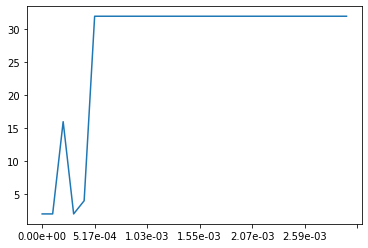

In [10]:
df.idxmin().plot()

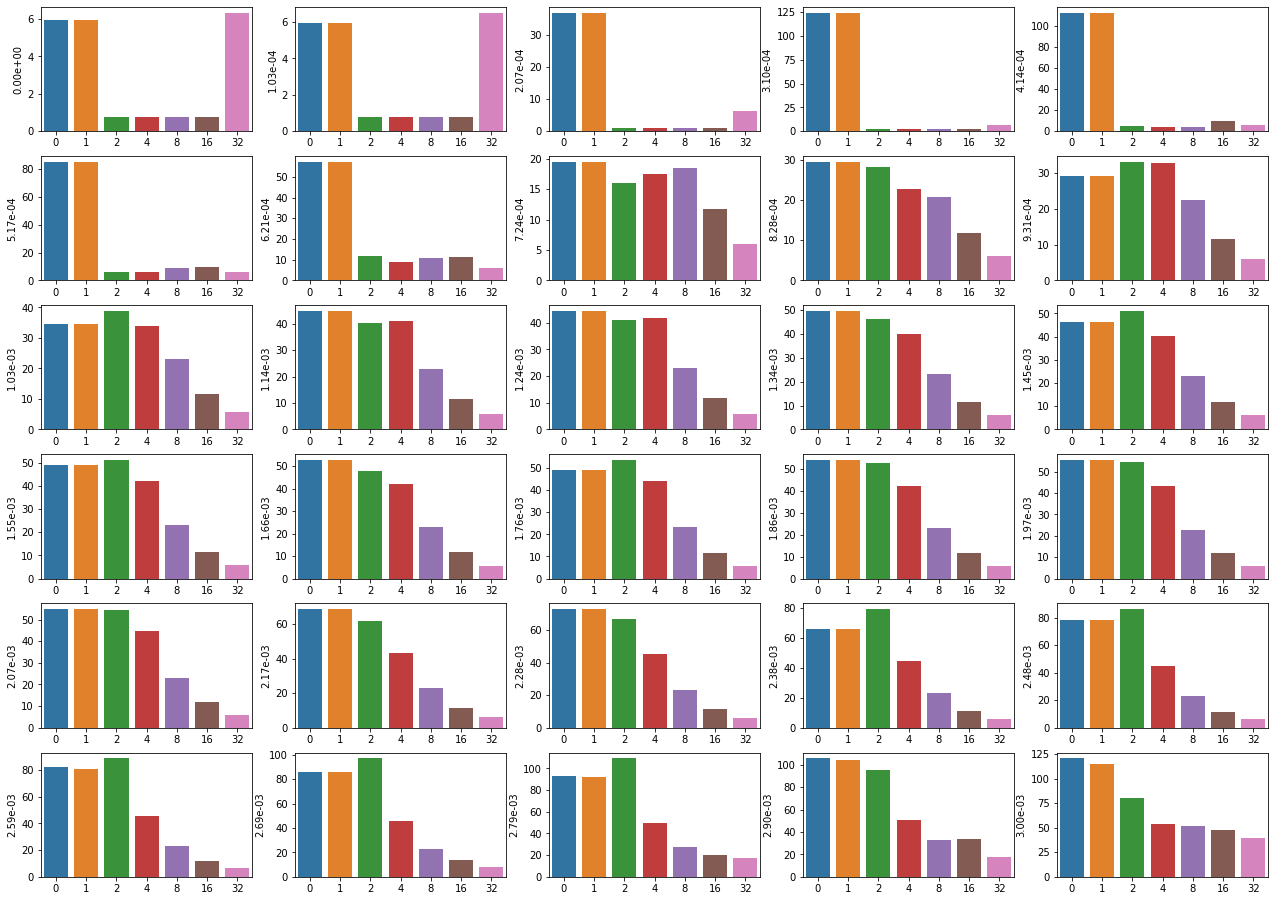

In [40]:
_, axes = plt.subplots(6, 5, figsize=(22, 16))
c, r = 0, 0
for col in df.columns:
    sns.barplot(x=df.index, y=col, data=df, ax=axes[c, r])
    
    r += 1
    if r > 4:
        c+=1
        r=0

### 3. Observations

- a. after 5e-4 noise the the minimum error is always achieved by 32 fixed points
- b. before that we have very high values with 0 and 1 fixed points, probably a bug
- c. constant error at 32 fixed points

### 4. Debugging


In [43]:
ls

backup/  images/       __pycache__/  ring_attractor.py   utils.py
csv/     lif_model.py  README.md     simulation_loop.py
